# Market Basket Analysis 

!pip install pyhive

!pip install thrift

!pip install thrift_sasl

In [1]:
import thrift_sasl
from pyhive import hive
import pandas as pd

conda install -c conda-forge sasl

!pip install impyla

In [2]:
# Establish a connection to Hive
from impala.dbapi import connect

conn = connect(host='localhost', port=10000, auth_mechanism='LDAP', user='root', password='Pratik@123')

# Create a cursor
cursor = conn.cursor()
cursor.execute('SHOW TABLES')

In [3]:
# Execute a query to fetch the table data
cursor.execute('SELECT * FROM market_basket_optimisation')

In [4]:
# Fetch all the rows from the result set
rows = cursor.fetchall()

In [5]:
# Get the column names from the cursor description
columns = [desc[0] for desc in cursor.description]

In [6]:
columns

['market_basket_optimisation.column1',
 'market_basket_optimisation.column2',
 'market_basket_optimisation.column3',
 'market_basket_optimisation.column4',
 'market_basket_optimisation.column5',
 'market_basket_optimisation.column6',
 'market_basket_optimisation.column7',
 'market_basket_optimisation.column8',
 'market_basket_optimisation.column9',
 'market_basket_optimisation.column10',
 'market_basket_optimisation.column11',
 'market_basket_optimisation.column12',
 'market_basket_optimisation.column13',
 'market_basket_optimisation.column14',
 'market_basket_optimisation.column15',
 'market_basket_optimisation.column16',
 'market_basket_optimisation.column17',
 'market_basket_optimisation.column18',
 'market_basket_optimisation.column19',
 'market_basket_optimisation.column20']

In [7]:
# Create a DataFrame from the fetched rows and column names
data = pd.DataFrame(rows, columns=columns)

In [8]:
import pandas as pd

# Taking the data as the DataFrame
data.columns = range(len(data.columns))

# Print the DataFrame with the updated column names
print(data)


                 0                  1            2                 3   \
0            shrimp            almonds      avocado    vegetables mix   
1           burgers          meatballs         eggs              None   
2           chutney               None         None              None   
3            turkey            avocado         None              None   
4     mineral water               milk   energy bar  whole wheat rice   
...             ...                ...          ...               ...   
7496         butter         light mayo  fresh bread              None   
7497        burgers  frozen vegetables         eggs      french fries   
7498        chicken               None         None              None   
7499       escalope          green tea         None              None   
7500           eggs    frozen smoothie  yogurt cake    low fat yogurt   

                4                 5     6               7             8   \
0     green grapes  whole weat flour  yams  cot

In [9]:
# Close the cursor and connection
cursor.close()
conn.close()

In [10]:
# Print the DataFrame
print(data)

                 0                  1            2                 3   \
0            shrimp            almonds      avocado    vegetables mix   
1           burgers          meatballs         eggs              None   
2           chutney               None         None              None   
3            turkey            avocado         None              None   
4     mineral water               milk   energy bar  whole wheat rice   
...             ...                ...          ...               ...   
7496         butter         light mayo  fresh bread              None   
7497        burgers  frozen vegetables         eggs      french fries   
7498        chicken               None         None              None   
7499       escalope          green tea         None              None   
7500           eggs    frozen smoothie  yogurt cake    low fat yogurt   

                4                 5     6               7             8   \
0     green grapes  whole weat flour  yams  cot

In [11]:
# for basic operations
import numpy as np
import pandas as pd

In [12]:
# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

In [13]:
# for defining path
import os

In [14]:
# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [15]:
# let's check the shape of the dataset
data.shape

(7501, 20)

In [16]:
# checking the head of the data
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,chutney,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,turkey,avocado,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,mineral water,milk,energy bar,whole wheat rice,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [17]:
# checkng the tail of the data
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7498,chicken,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7499,escalope,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [18]:
# checking the random entries in the data
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
436,mineral water,mushroom cream sauce,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
989,burgers,mineral water,soup,meatballs,olive oil,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6067,chicken,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4532,eggs,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1617,chocolate,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2782,fresh tuna,shrimp,frozen vegetables,tomatoes,tomato sauce,spaghetti,mineral water,milk,cider,whole wheat rice,clothes accessories,frozen smoothie,None,None,None,None,None,None,None,None
1509,candy bars,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
14,mineral water,salmon,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5877,mineral water,eggs,mint,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6260,burgers,eggs,french fries,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [19]:
# let's describe the dataset
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


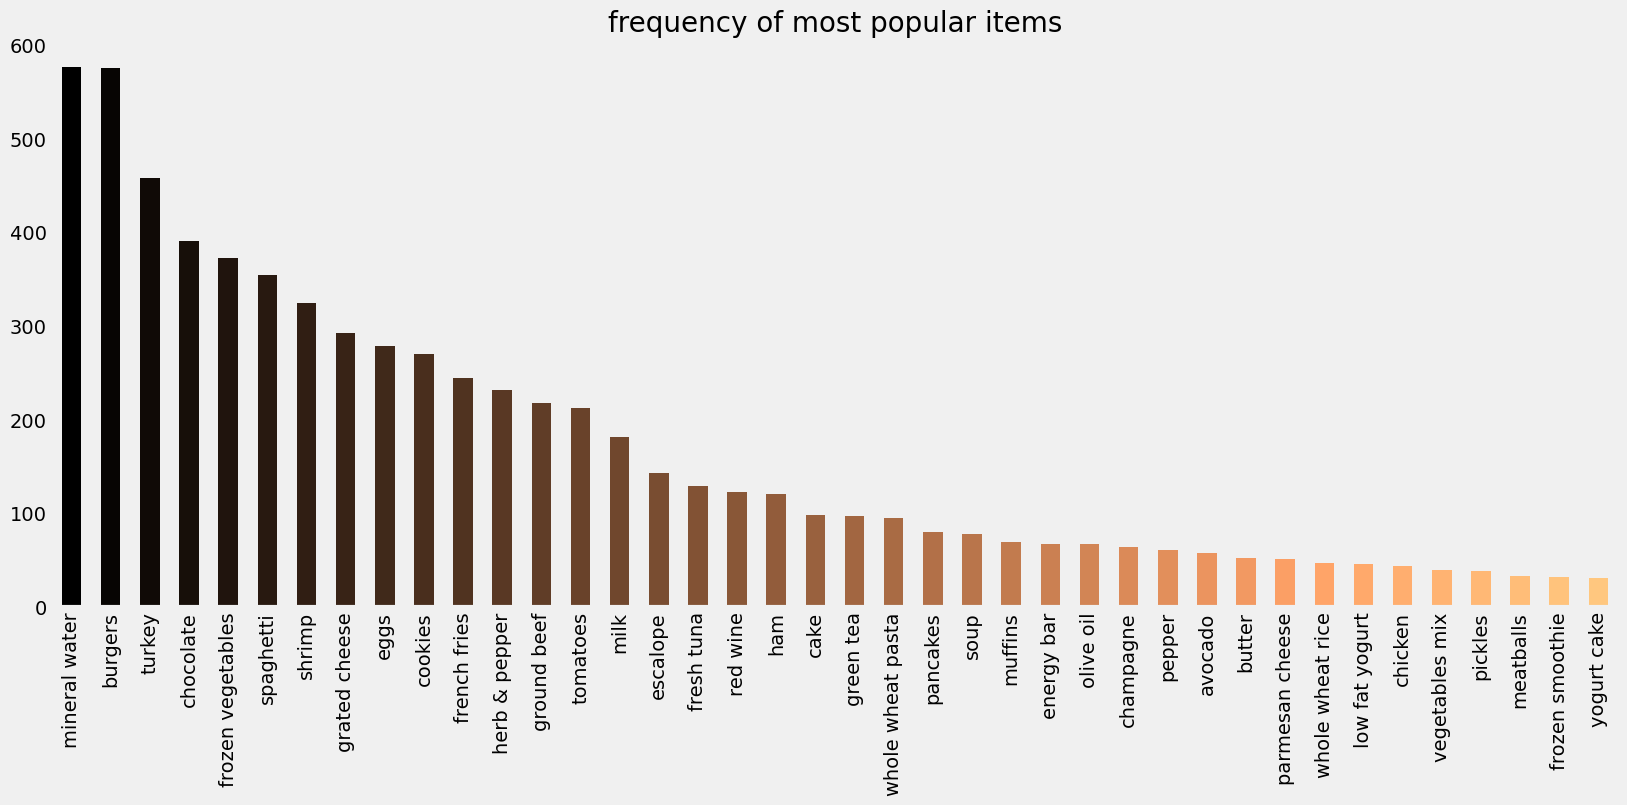

In [20]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [21]:
y = data[0].value_counts().head(50).to_frame()
y.index

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake', 'salmon', 'dessert wine', 'hot dogs', 'honey',
       'candy bars', 'cereals', 'strawberries', 'yams', 'oil', 'tomato sauce'],
      dtype='object')

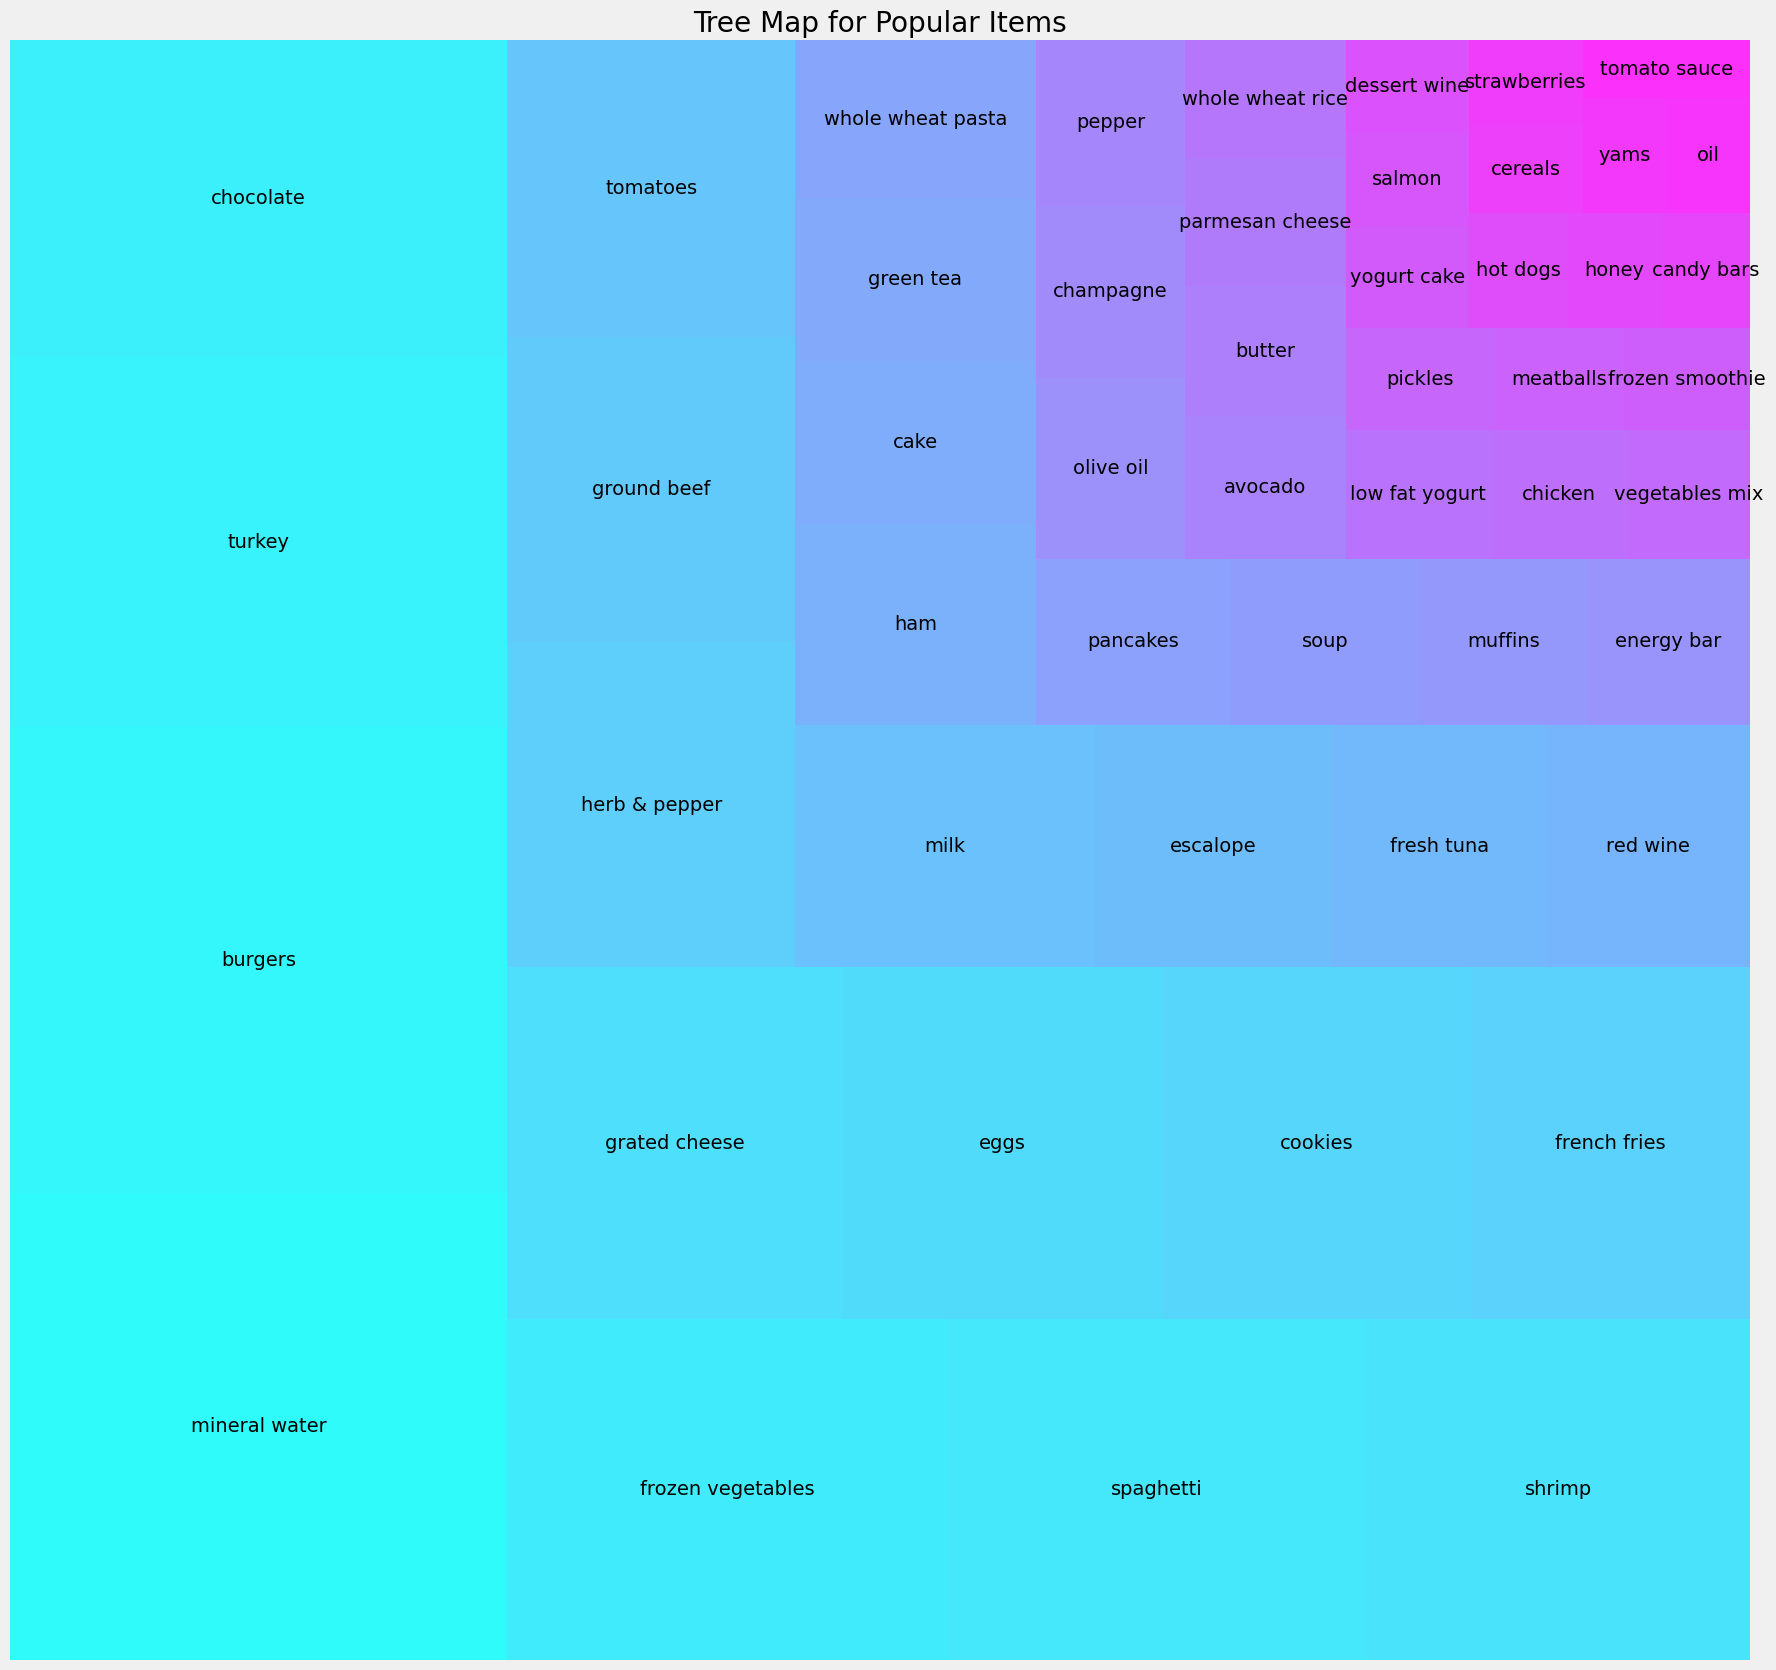

In [22]:
# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

In [23]:
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)
import networkx as nx

food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

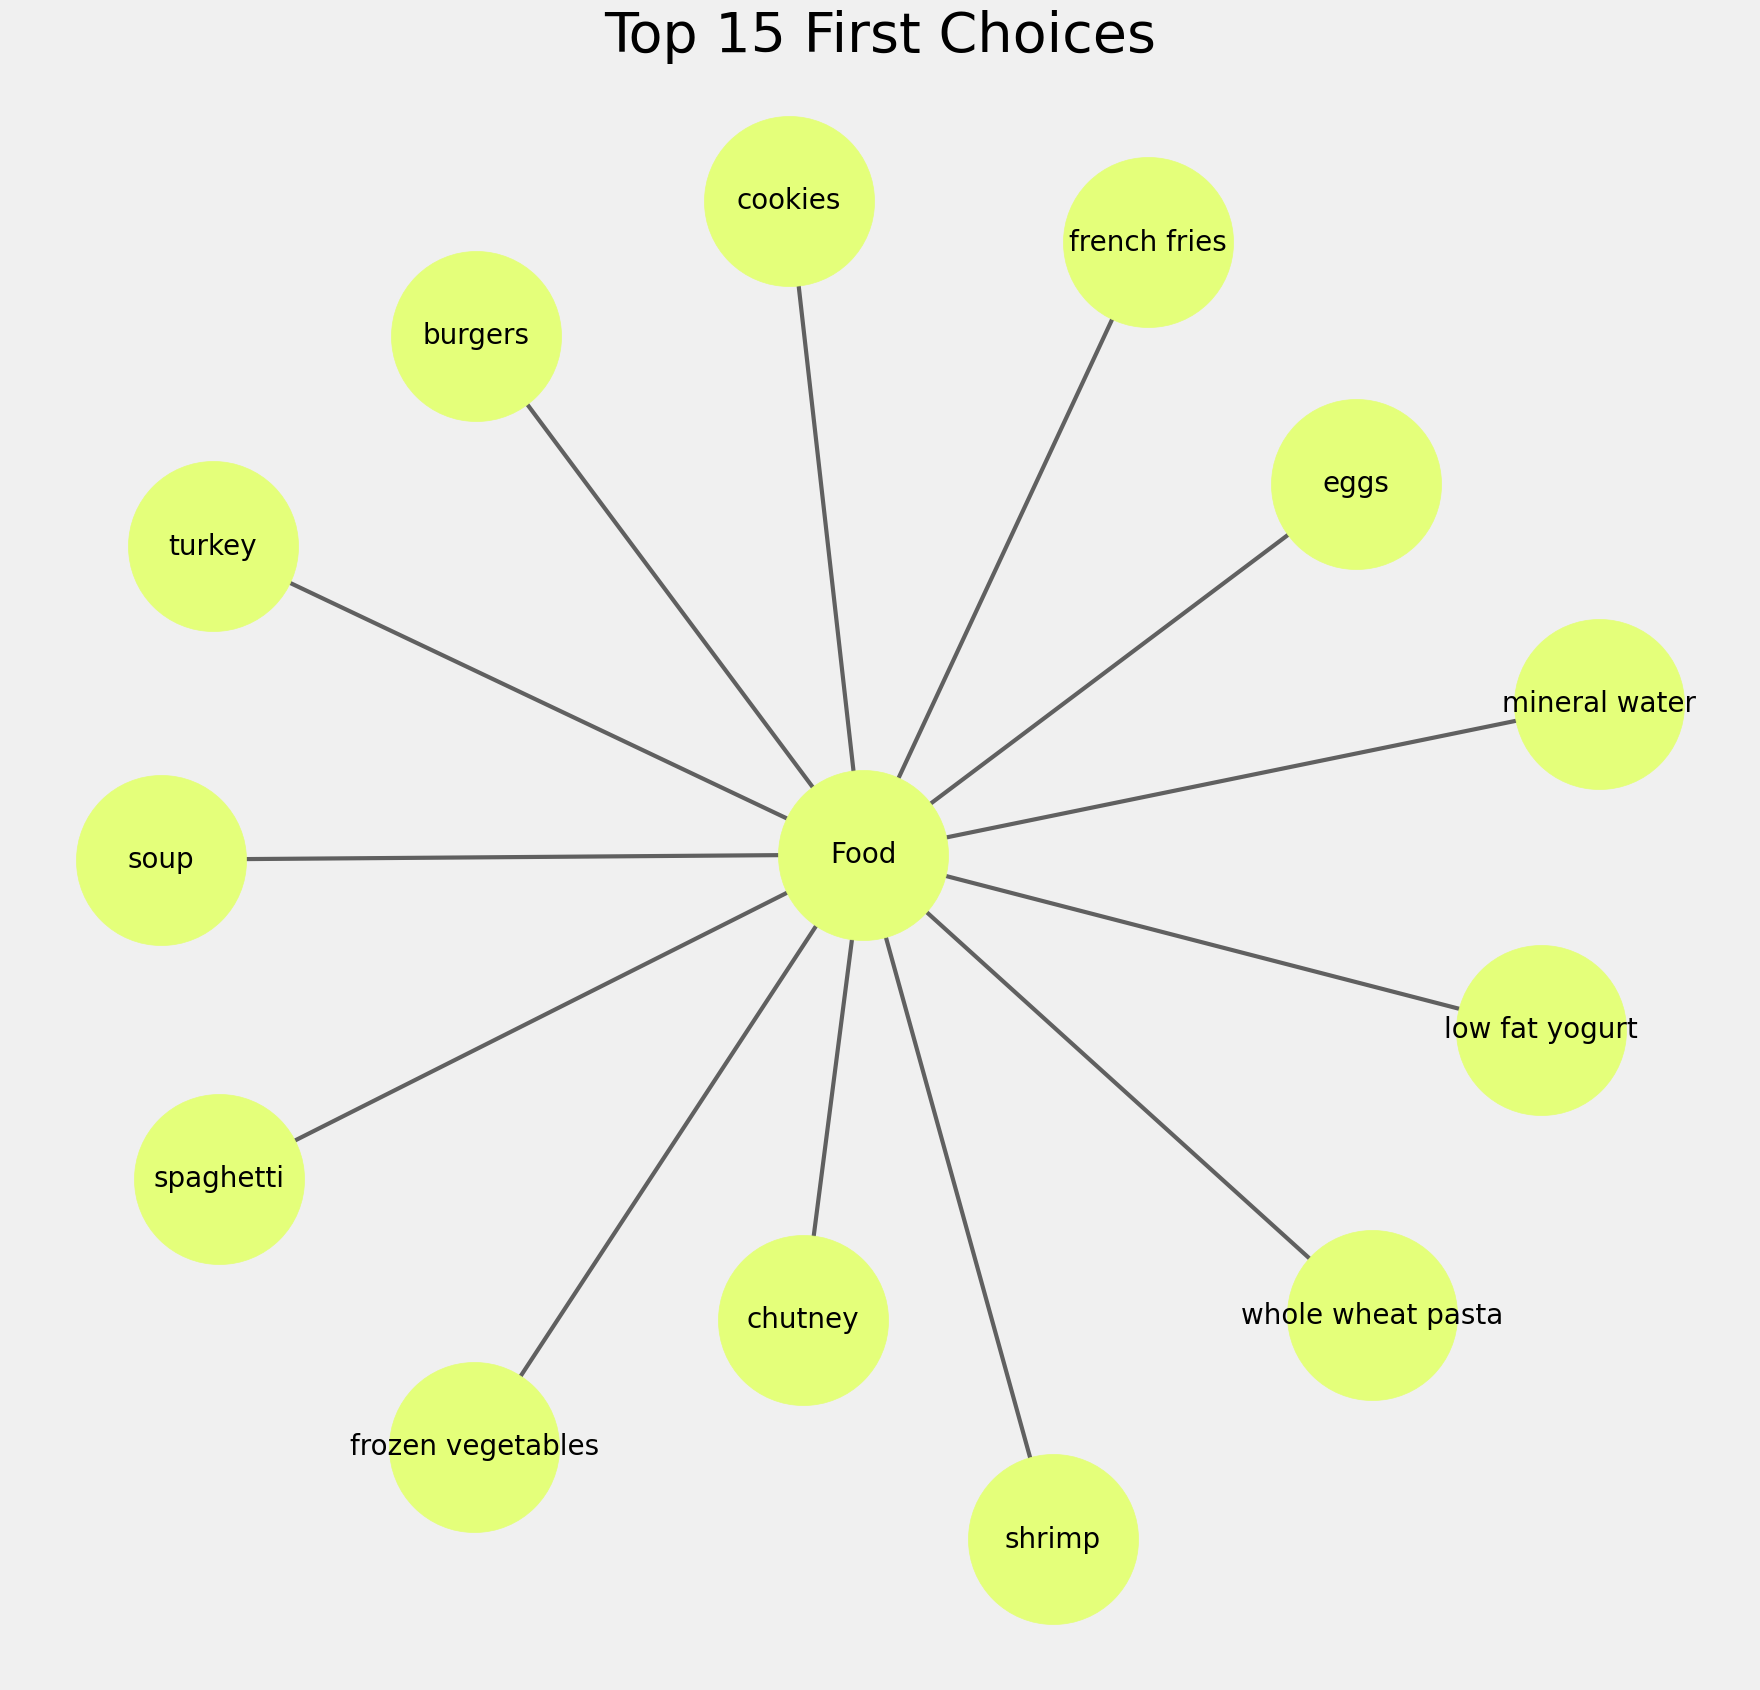

In [24]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

In [25]:
data = data.fillna(np.nan)

In [26]:
data['secondchoice'] = 'Second Choice'
secondchoice = data.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 1, edge_attr = True)

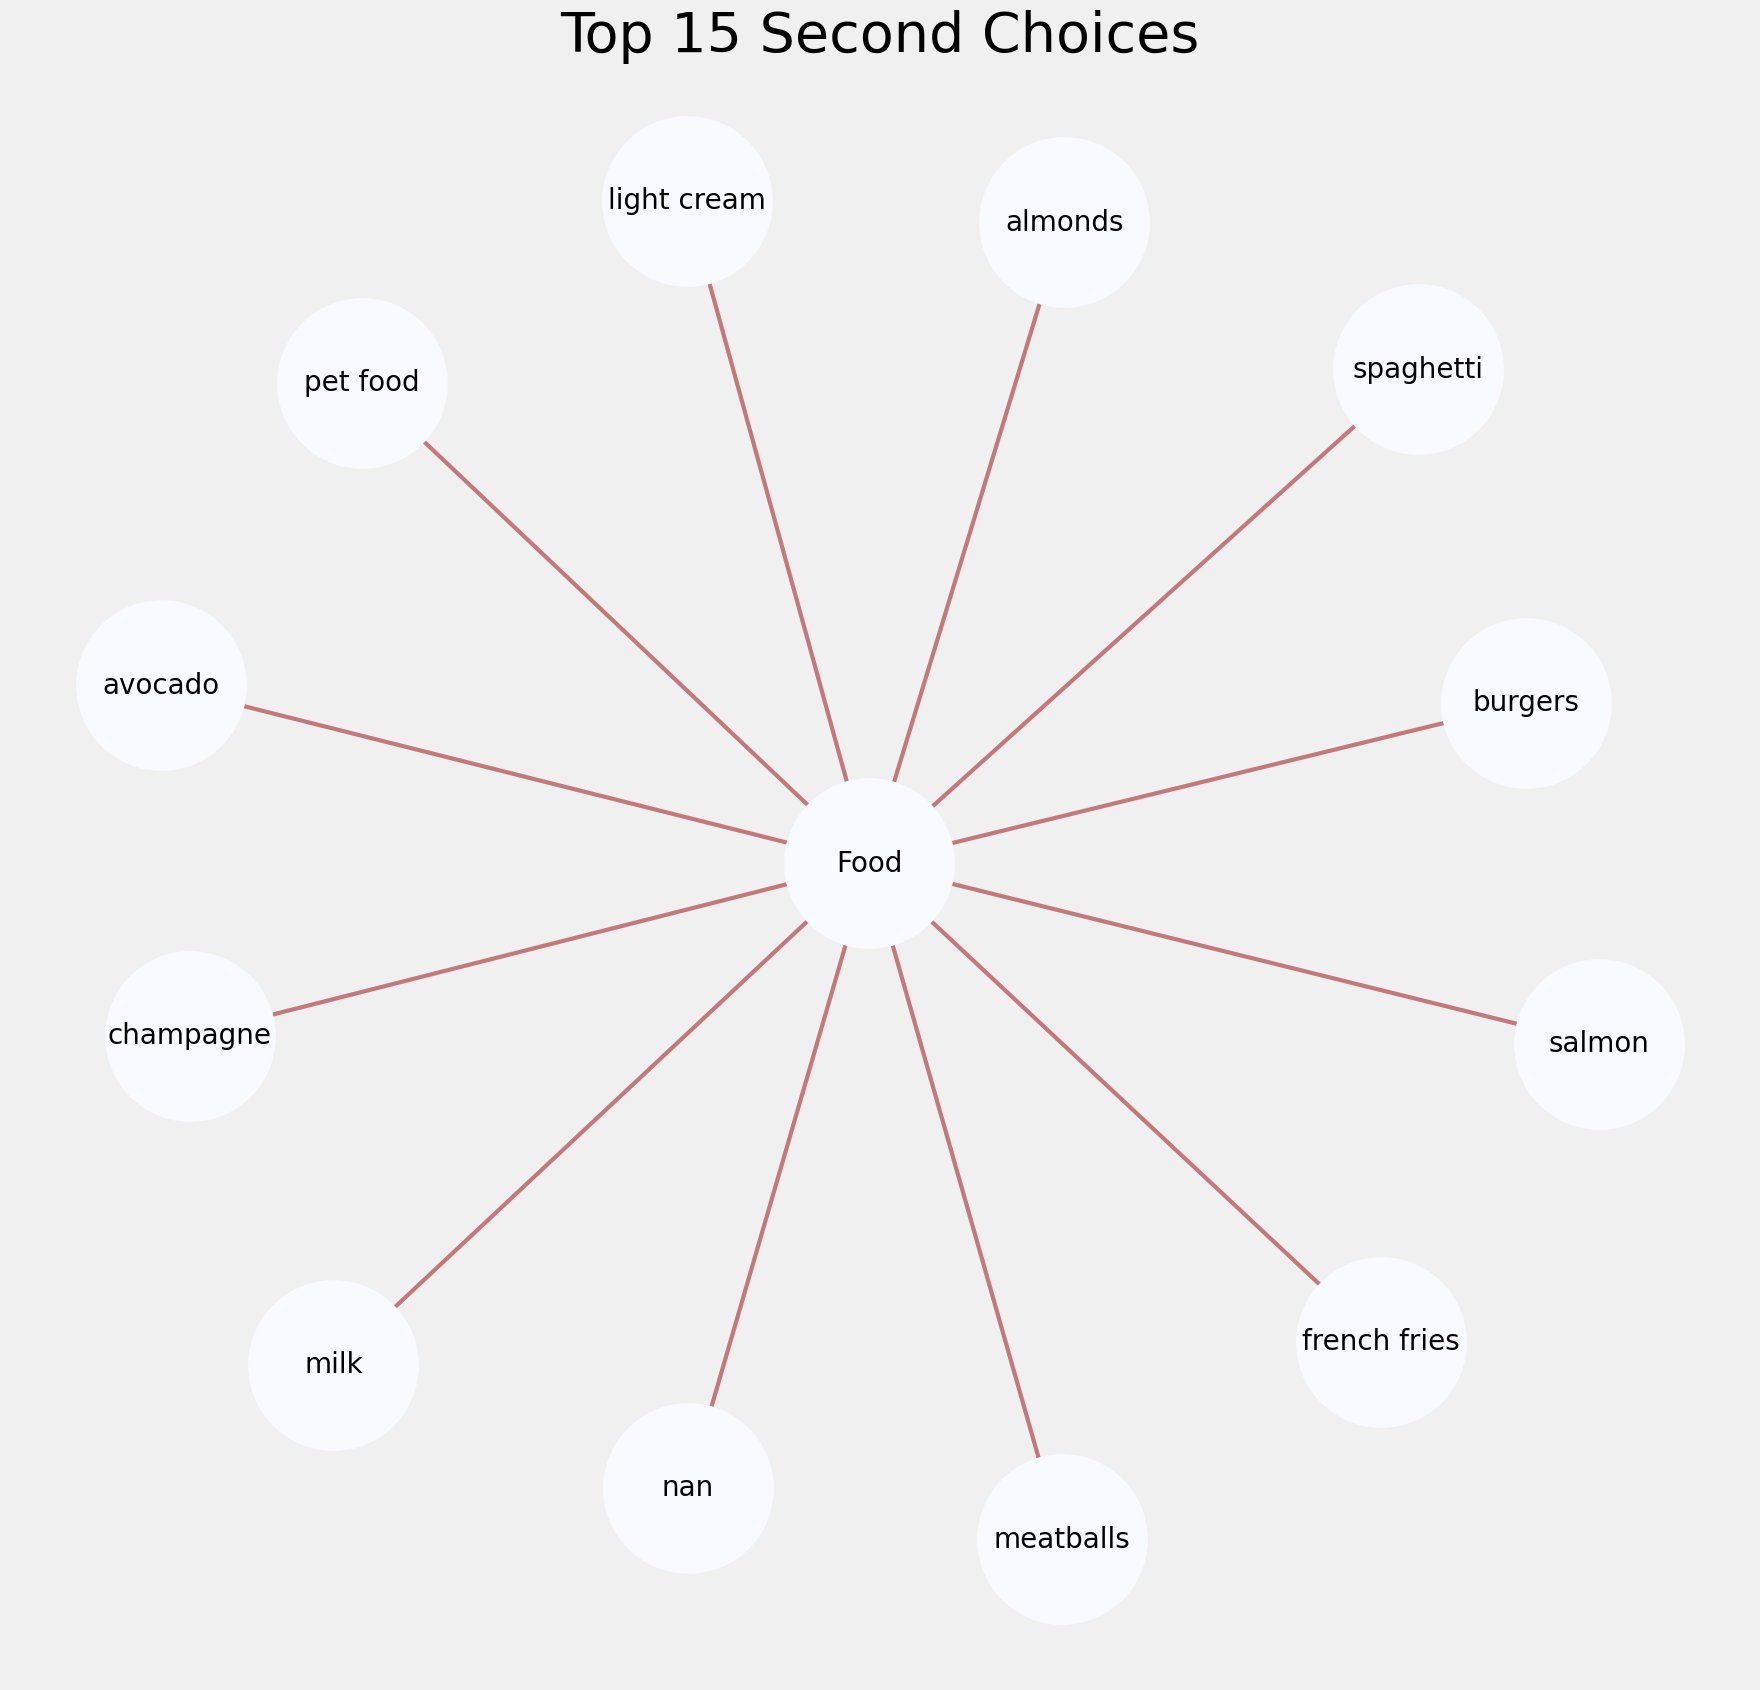

In [27]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Blues(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'brown')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 40)
plt.show()

In [28]:
data['thirdchoice'] = 'Third Choice'
secondchoice = data.truncate(before = -1, after = 10)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 2, edge_attr = True)

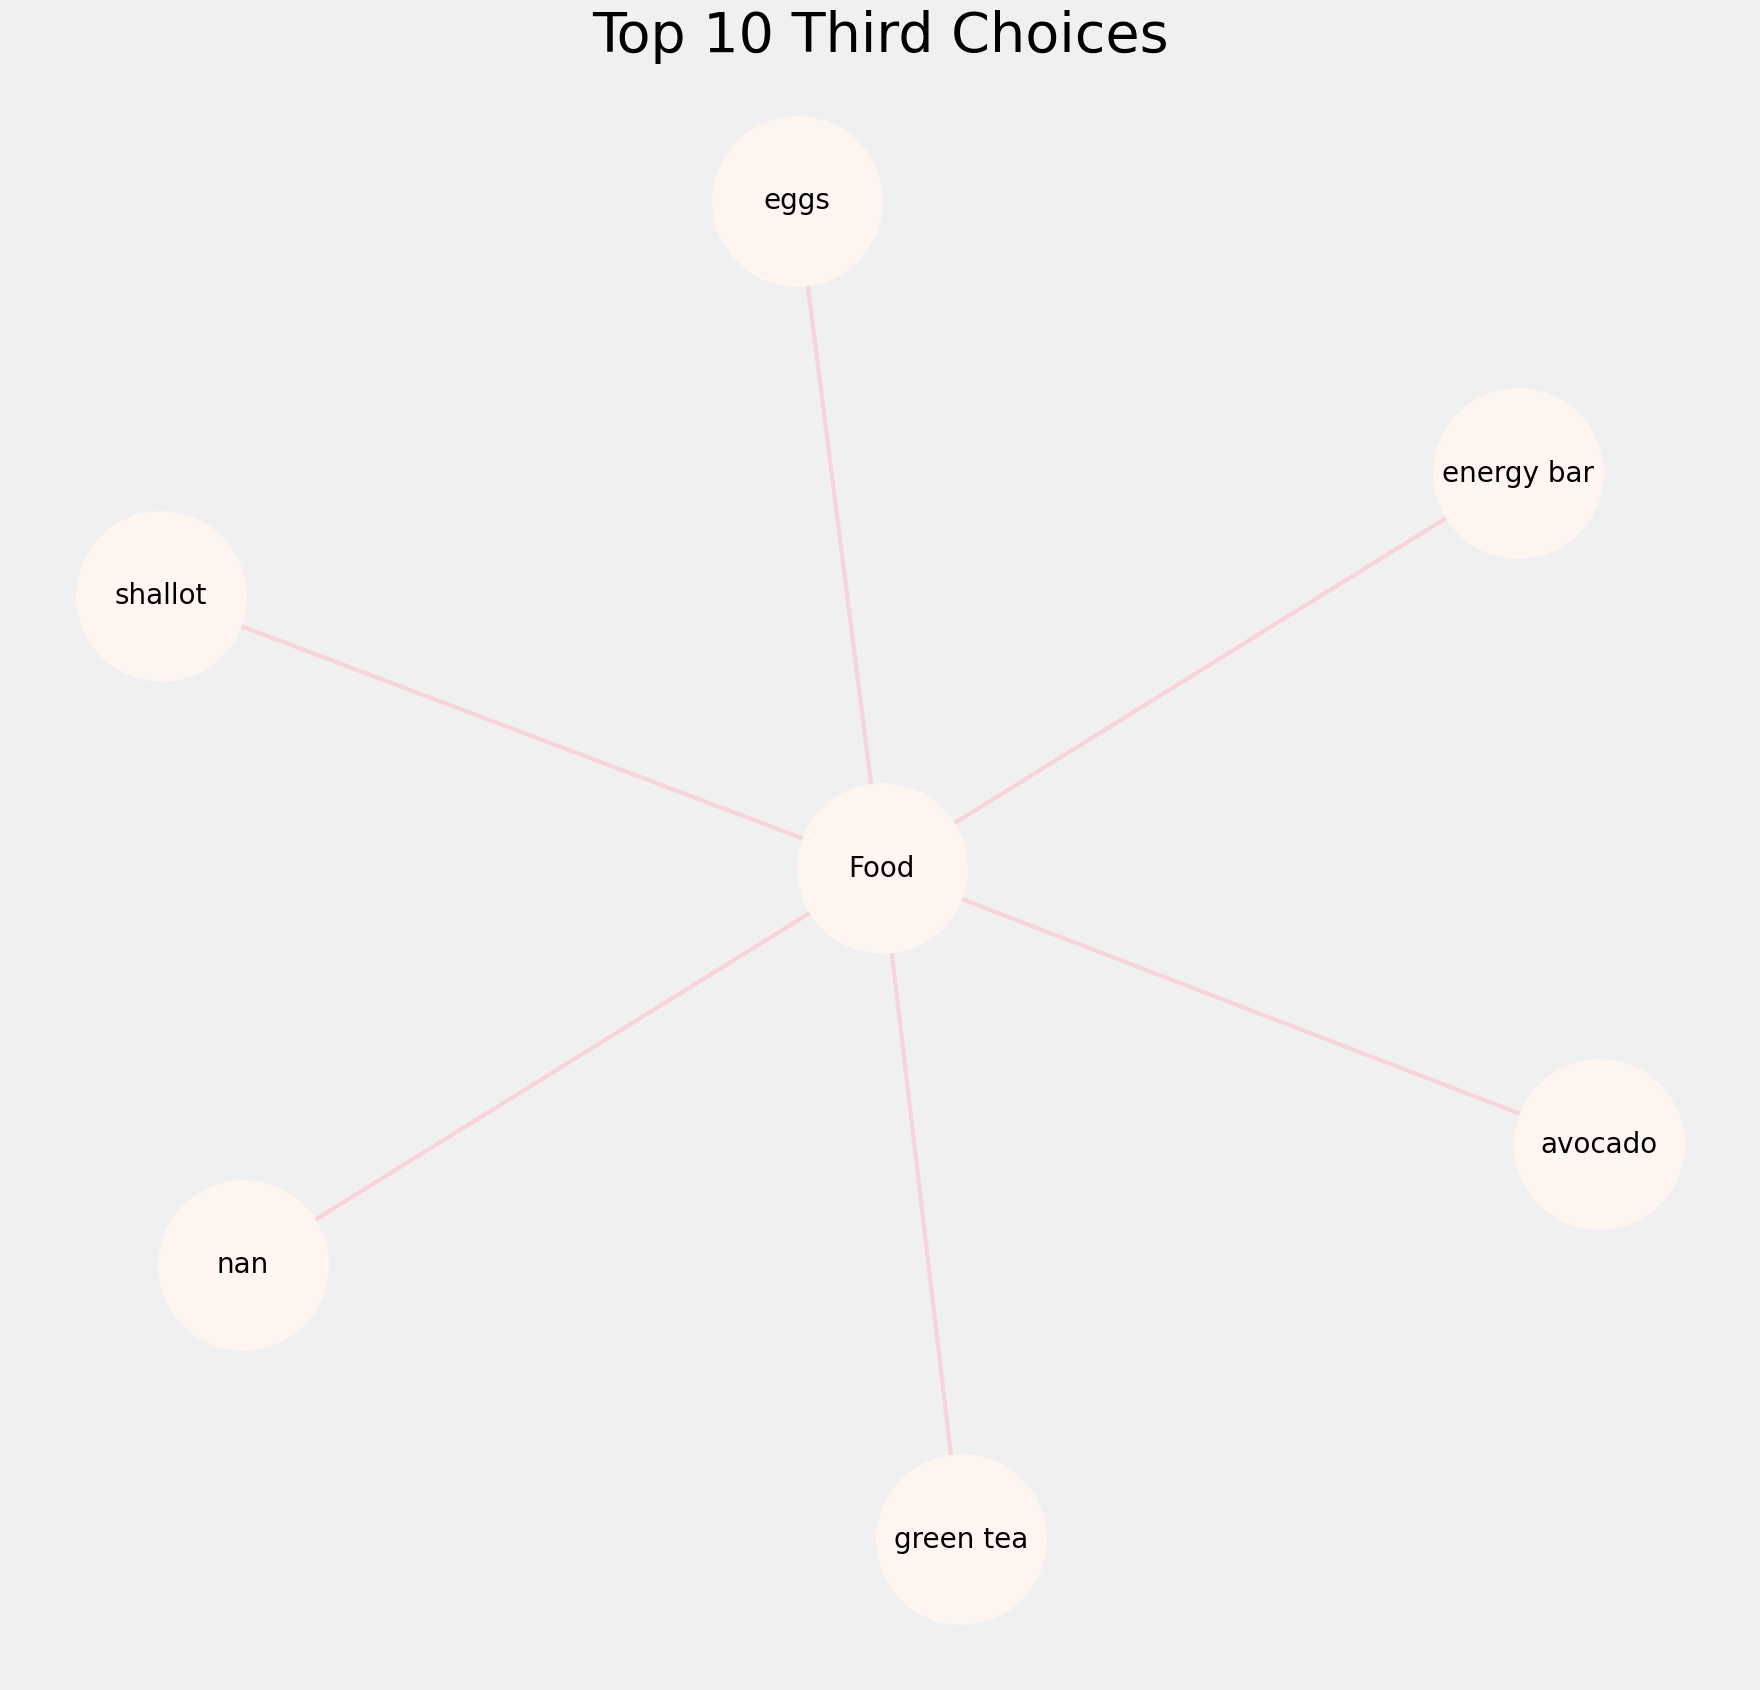

In [29]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Reds(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'pink')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 10 Third Choices', fontsize = 40)
plt.show()

In [30]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

In [31]:
# conveting it into an numpy array
trans = np.array(trans)

In [32]:
# checking the shape of the array
print(trans.shape)

(7501, 20)


In [33]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

In [34]:
# getting the shape of the data
data.shape

(7501, 121)

In [35]:
import warnings
warnings.filterwarnings('ignore')

# getting correlations for 121 items would be messy 
# so let's reduce the items from 121 to 40

data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                    'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                    'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne', 
                    'avocado', 'pepper', 'butter', 'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 
                    'chicken', 'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie', 'yogurt cake']]

In [36]:
# checking the shape
data.shape

(7501, 40)

In [37]:
# let's check the columns

data.columns

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'avocado', 'pepper', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake'],
      dtype='object')

In [38]:
# getting the head of the data

data.head()

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,butter,parmesan cheese,whole wheat rice,low fat yogurt,chicken,vegetables mix,pickles,meatballs,frozen smoothie,yogurt cake
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [39]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 1% support:
apriori(data, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
...,...,...
204,0.010132,"(mineral water, eggs, ground beef)"
205,0.013065,"(mineral water, eggs, milk)"
206,0.011065,"(mineral water, milk, ground beef)"
207,0.010532,"(chocolate, eggs, spaghetti)"


In [40]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


In [41]:

2# getting th item sets with length = 2 and support more han 10%
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
 (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
24,0.052660,"(chocolate, mineral water)",2
25,0.059725,"(mineral water, spaghetti)",2
26,0.050927,"(mineral water, eggs)",2


In [42]:
# getting th item sets with length = 2 and support more han 10%
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
 (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


In [43]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'eggs', 'mineral water'} ]

,support,itemsets,length
26,0.050927,"(mineral water, eggs)",2


In [44]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'mineral water'} ]

,support,itemsets,length
0,0.238368,(mineral water),1


In [45]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'milk'} ]

,support,itemsets,length
13,0.129583,(milk),1


In [46]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'chicken'} ]

,support,itemsets,length
22,0.059992,(chicken),1


In [47]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'frozen vegetables'} ]

,support,itemsets,length
4,0.095321,(frozen vegetables),1


In [48]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'chocolate'} ]

,support,itemsets,length
3,0.163845,(chocolate),1
